# Experiment 1: Lists as data structures for Graphs

[//]: # (------------------------------------------    DO NOT MODIFY THIS    ------------------------------------------)
<style type="text/css">
.tg  {border-collapse:collapse;
      border-spacing:0;
     }
.tg td{border-color:black;
       border-style:solid;
       border-width:1px;
       font-family:Arial, sans-serif;
       font-size:14px;
       overflow:hidden;
       padding:10px 5px;
       word-break:normal;
      }
.tg th{border-color:black;
       border-style:solid;
       border-width:1px;
       font-family:Arial, sans-serif;
       font-size:14px;
       font-weight:normal;
       overflow:hidden;
       padding:10px 5px;
       word-break:normal;
      }
.tg .tg-fymr{border-color:inherit;
             font-weight:bold;
             text-align:left;
             vertical-align:top
            }
.tg .tg-0pky{border-color:inherit;
             text-align:left;
             vertical-align:top
            }
[//]: # (--------------------------------------------------------------------------------------------------------------)

[//]: # (-------------------------------------    FILL THIS OUT WITH YOUR DATA    -------------------------------------)
</style>
<table class="tg">
    <tbody>
      <tr>
        <td class="tg-fymr" style="font-weight: bold">Title:</td>
        <td class="tg-0pky"> Experiment 1: Lists as data structures for Graphs</td>
      </tr>
      <tr>
        <td class="tg-fymr" style="font-weight: bold">Authors:</td>
        <td class="tg-0pky">
            <a href="https://github.com/ecarrenolozano" target="_blank" rel="noopener noreferrer">Edwin Carreño</a>
        </td>
      </tr>
      <tr>
        <td class="tg-fymr" style="font-weight: bold">Affiliations:</td>
        <td class="tg-0pky">
            <a href="https://www.ssc.uni-heidelberg.de/en" target="_blank" rel="noopener noreferrer">Scientific Software Center</a>
        </td>
      </tr>
      <tr>
        <td class="tg-fymr" style="font-weight: bold">Date Created:</td>
        <td class="tg-0pky">30.10.2024</td>
      </tr>
      <tr>
        <td class="tg-fymr" style="font-weight: bold">Description:</td>
        <td class="tg-0pky">Creation of a graph using Python lists and data from CSV files. Conversion to NetworkX is tested too.</td>
      </tr>
    </tbody>
</table>

[//]: # (--------------------------------------------------------------------------------------------------------------)

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/quickstart/beginner.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/tensorflow/docs/blob/master/site/en/tutorials/quickstart/beginner.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
  </td>  
</table>

## Overview

In this notebook we are going to:

1. Import CSV (comma-separated values) data from nodes and edges.
2. Describe the data from CSVs.
3. Create a data pipeline that:
   - load csv data.
   - transform the format of tuples that represents edges (from 5 to 3 elements).
   - create a list (data structure) of tuples containing the information of edges .
4. Create a NetworkX graph from an edge list.

## Setup (if required)

**Note:** If your code require to install dependencies before your main code, please add the commands to install the dependencies. You can silence the messages returned by `pip` the flag `-q`, i.e. `pip install pandas -q`

### NetworkX installation

In [21]:
!pip install networkx[default] -q

## Importing Libraries

In [4]:
"""
Recommendations:
    - Respect the order of the imports, they are indicated by the numbers 1, 2, 3.
    - One import per line is recommended, with this we can track easily any modified line when we use git.
    - Absolute imports are recommended (see 3. Local application/library specific imports below), they improve readability and give better error messages.
    - You should put a blank line between each group of imports.
"""

# future-imports (for instance: from __future__ import barry_as_FLUFL)
# from __future__ import barry_as_FLUFL  

# 1. Standard library imports
import ast
import csv
import os

# 2. Related third party imports
import networkx as nx

# 3. Local application/library specific imports
# import <mypackage>.<MyClass>         # this is an example
# from <mypackage> import <MyClass>    # this is another example 

## Helper Functions

In [5]:
def create_edgelist_ds(iterable):
    return [edge for edge in iterable]    

def edges_generator_streaming(edgelist):
    for edge in edgelist:

        # Original format
        #  (id, source node, target node, label, properties)
        
        # Desired format
        #  (source node, target node, properties)

        edge_source = edge[1]
        edge_target = edge[2]
        properties = ast.literal_eval(edge[4])
        properties["id"] = edge[0]
        properties["label"] = edge[3]
        
        #dict_prop = {"id":edge[0],
        #            "label":edge[3],
        #            "properties":edge[4
        #            }
        yield(
            edge_source,
            edge_target,
            properties
            #dict_prop
        ) 

def load_csv_module(filepath, header=True):
    list_rows = []
    with open(filepath, 'r') as file:
        reader = csv.reader(file)
        for row in reader:
            if header: # Skip first row when header exists
                header = False
                continue

            row = [field.strip() for field in row]
            list_rows.append(tuple(row))  # Add each row to the list
            
    return list_rows

## Introduction

## Section 1: Load the CSV data that contains nodes and edges

For this exercise, each graph is represented by two CSV files. One containing information about the **nodes** and the other about the **edges**. To indicate that both files correspond to the same graph, their names include the same number of nodes. For example:

- `dataset_30_nodes_proteins.csv`: contains 30 rows (nodes).
- `dataset_30_edges_interactions.csv`: contains 47 rows (edges).

We reference each CSV file or dataset as follows:

In [6]:
filename_nodes = "dataset_30_nodes_proteins.csv"
filename_edges = "dataset_30_edges_interactions.csv"

### 1.1: Load Nodes

The CSV file for nodes contains three columns:
- `UniProt ID`
- `label`
- `properties`

We are going to load the information of nodes as a **list of tuples**. Each tuple represents a node with the structure:
- `(id, label, properties)`
- Each field in the tuple is a `string`
- The `properties` field is a string containing a dictionary of properties.

In [9]:
filepath_nodes = os.path.join("./datasets", filename_nodes)

list_nodes = load_csv_module(filepath_nodes, header=True)

In [10]:
print("The list of NODES contains: {} nodes".format(len(list_nodes)))
print("Example:\n\t{}".format(list_nodes[0]))

The list of NODES contains: 30 nodes
Example:
	('G0P1I0', 'uniprot_protein', "{'sequence': 'QKRTLFKVEFGSMSWFYKHRTNMHLRTMMYD', 'description': 'Lorem ipsum ilymp', 'taxon': '7813'}")


### 1.2: Load Edges

The CSV file for edges contains five columns:
- `Relation ID`
- `Source ID`
- `Target ID`
- `label`
- `properties`

We are going to load the information of edges as a list of tuples. Each tuple represents a node with thethe structure:
- `(id, source, target, label, properties)`
- Each field in the tuple is a `string`
- The `properties` field is string containing a dictionary of properties.

In [11]:
filepath_edges = os.path.join("./datasets", filename_edges)

list_edges = load_csv_module(filepath_edges, header=True)

In [13]:
print("The list of EDGES contains: {} edges".format(len(list_edges)))
print("Example:")
for edge in list_edges[0:6]:
    print("\t{}".format(edge))

The list of EDGES contains: 47 edges
Example:
	('', 'B6V6V7', 'H9R6K5', 'interacts_with', "{'source': 'signor'}")
	('', 'B6V6V7', 'I5X3I2', 'interacts_with', "{'method': 'Lorem ipsum pblfc'}")
	('', '385603', 'H9R6K5', 'interacts_with', "{'source': 'intact', 'method': 'Lorem ipsum nbqvj'}")
	('', '385603', 'I9A3P8', 'interacts_with', '{}')
	('', 'L3V2Y6', 'X0C9T5', 'interacts_with', "{'source': 'intact', 'method': 'Lorem ipsum zwhrq'}")
	('intact956331', 'L3V2Y6', 'Y8Y3K0', 'interacts_with', "{'source': 'signor'}")


## Section 2: Create Data Pipeline

- **input:** CSV data of edges
- **output:** List of tuples containing information of edges

The pipeline consist of three consecutive stages:

| Stage | Function                      | Description |
|-------|-------------------------------| ----------- |
| 1     | `load_csv_module()`           | read the csv and load the information in memory    |
| 2     | `edges_generator_streaming()` | transform the tuples to desired format             |
| 3     | `create_edgelist_ds()`        | create an edgelist containing all the tuples       |

### 2.1 Create List of tuples (data structure)

In [14]:
edgelist = create_edgelist_ds(edges_generator_streaming(load_csv_module(filepath_edges, header=True)))

In [15]:
for edge in edgelist[0:5]:
    print(edge)

('B6V6V7', 'H9R6K5', {'source': 'signor', 'id': '', 'label': 'interacts_with'})
('B6V6V7', 'I5X3I2', {'method': 'Lorem ipsum pblfc', 'id': '', 'label': 'interacts_with'})
('385603', 'H9R6K5', {'source': 'intact', 'method': 'Lorem ipsum nbqvj', 'id': '', 'label': 'interacts_with'})
('385603', 'I9A3P8', {'id': '', 'label': 'interacts_with'})
('L3V2Y6', 'X0C9T5', {'source': 'intact', 'method': 'Lorem ipsum zwhrq', 'id': '', 'label': 'interacts_with'})


## Section 3: Creating NetworkX 

In [16]:
try:
    G.clear()
    print("Graph has been cleared!")
except:
    print("Graph G doesn't exist")

Graph G doesn't exist


### 3.1 Create a Directed Graph

In [17]:
G = nx.from_edgelist(edgelist, create_using=nx.DiGraph)

### 3.2 Draw Graph

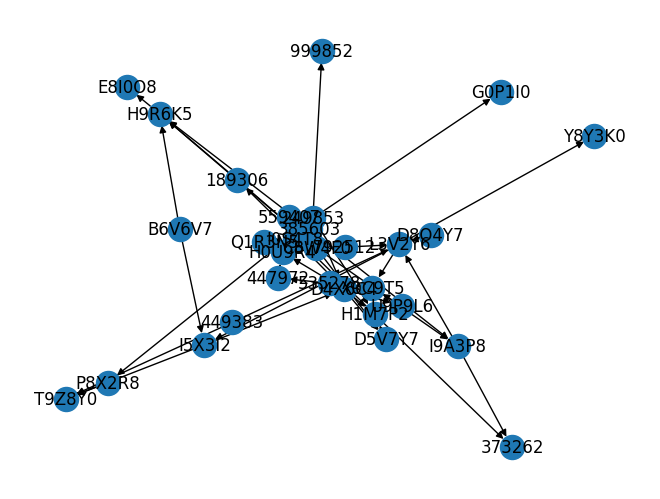

In [18]:
nx.draw(G, with_labels=True)

### 3.3 Some statistics

In [19]:
print("Number of nodes: {}".format(G.number_of_nodes()))
print("Number of edges: {}".format(G.number_of_edges()))

Number of nodes: 30
Number of edges: 47


In [20]:
limit = 5
for index, edge in enumerate(G.edges(data=True)):
    if index == limit:
        break
    print(edge)

('B6V6V7', 'H9R6K5', {'source': 'signor', 'id': '', 'label': 'interacts_with'})
('B6V6V7', 'I5X3I2', {'method': 'Lorem ipsum pblfc', 'id': '', 'label': 'interacts_with'})
('H9R6K5', 'E8I0O8', {'id': 'intact277910', 'label': 'interacts_with'})
('I5X3I2', 'D4X6C4', {'source': 'intact', 'method': 'Lorem ipsum iiozd', 'id': '', 'label': 'interacts_with'})
('I5X3I2', 'T9Z8Y0', {'method': 'Lorem ipsum gconp', 'id': 'intact994853', 'label': 'interacts_with'})
